#Part 1 - Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


In [2]:
# Read the file
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#check the data
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
# Setting the index to be 'login_time'
indexed_logins = logins.set_index(['login_time'])
indexed_logins['count'] = 1
indexed_logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [6]:
# Counting each 15-minute, 1 day interval

def resample(df, interval):
    # resample the dataframe 
    temp_resample = df.resample(interval).count()
    return temp_resample

In [7]:
def interval_plot(df, axis, title, y_label=''):
    plt.subplot(axis)
    plt.plot(df['count'])
    plt.ylabel(y_label)
    plt.title(title)
    plt.figure(figsize=(30,10))
    

In [8]:
#resampling
min15 = resample(indexed_logins, '15Min')
daily = resample(indexed_logins, 'D')

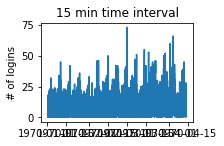

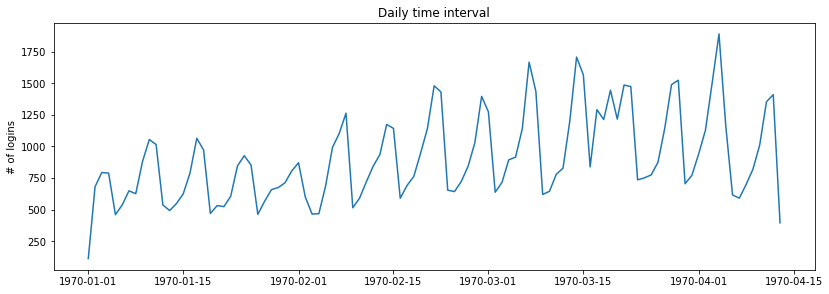

<Figure size 2160x720 with 0 Axes>

In [9]:
# 15 Min
interval_plot(min15, 222, "15 min time interval", "# of logins")
# Daily
interval_plot(daily, 222, "Daily time interval", "# of logins")
plt.show()

In [10]:
#From the plot above, we can see a trend that the logins are increasing in the period.

#Part 2 - Experiment and Metrics Design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. What would you choose as the key measure of success of this experiment in 
encouraging driver partners to serve both cities, and why would you choose this metric?

In [11]:
# A:I would choose the seperate number of times that drivers drive through the toll bridge on weekdays 
#and weekends compared to the number before the reimbursing happens as the key measure of success. 
#I choose the number of timess that drivers drive because the data is easy to get and easy to compare. 
#we can get the result form the comparison fast and accurate.

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

A: Since the standard deviation of our customer activity will be known prior to attempting this, I would use a 1-sample z statistic with the assumption that we have a sample size of at least 30.

h0 : there is no difference between drivers crossing the bridge for when the company is not reimbursing drivers for toll costs and when the company is reimbursing drivers for toll cost
h1 : there is a difference between drivers crossing the bridge for when the company is not reimbursing drivers for toll costs and when the company is reimbursing drivers for toll cost
I would then calculate the z-score for the customer activity after implementation of the reimbursement
Then using a 95% confidence interval I would determine whether or not the z-score falls in that range, and observe whether or not the null hypothesis can be rejected
If it can be rejected then I would recommend that the company continue to reimburse toll costs and continue to observe the number of times drivers are crossing the bridge to make sure company money is well spent

#Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Data description
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form ‘YYYY MM DD’
last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
avg_dist: the average distance in miles per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday

In [12]:
#import data
import json
data = pd.read_json('ultimate_data_challenge.json')

In [13]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
#there are some null value, we have to fill the null.

In [16]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [17]:
#fill null value
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(), inplace=True)
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(), inplace=True)
data['phone'].fillna('iPhone', inplace=True)

In [18]:
# Convert objects to dates
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [19]:
# Create a new column'retained' to identify retain user

In [20]:
print(min(data['last_trip_date']))
print(max(data['last_trip_date']))

2014-01-01 00:00:00
2014-07-01 00:00:00


In [21]:
data['retained'] = np.nan
data.loc[data['last_trip_date'] >= '2014-06-01', 'retained'] = 1
data.loc[data['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [22]:
data['retained'].value_counts()

0.0    31196
1.0    18804
Name: retained, dtype: int64

In [23]:
print('There is 18804 ratained drivers, the percentage is ' + str(round(18804/(18804+31196)*100, 2))+'%' +' of all drivers')

There is 18804 ratained drivers, the percentage is 37.61% of all drivers


In [24]:
#EDA and Data Cleaning
#Data Visualiztion
#Categorical Data

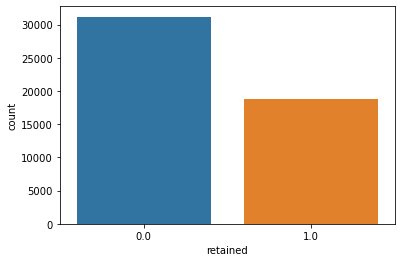

In [25]:
sns.countplot(x="retained", data=data)

In [26]:
#drop the column 'last_trip_date'
data.drop(columns = ['last_trip_date'], inplace = True)

In [27]:
#graph about categorical feature and retained drivers

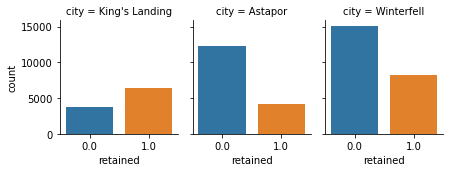

In [28]:
sns.catplot(x="retained", col="city", col_wrap=4,
                data=data,
                kind="count", height=2.5, aspect=.8)

In [29]:
#from the above graph, we can see that King's landing City has higher retention rate and Winterfell City has most drivers.

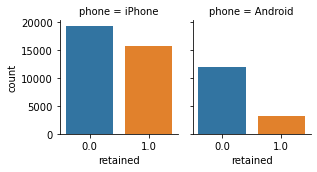

In [30]:
sns.catplot(x="retained", col="phone", col_wrap=4,
                data=data,
                kind="count", height=2.5, aspect=.8)

In [31]:
#from the above graph, there are more drivers use iphone. 

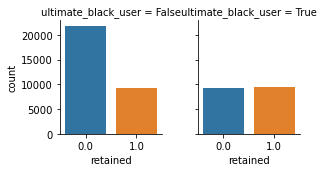

In [32]:
sns.catplot(x="retained", col="ultimate_black_user", col_wrap=4,
                data=data,
                kind="count", height=2.5, aspect=.8)

In [33]:
#from the above graph, the drivers with Ultimate Black have higher retention rate. 

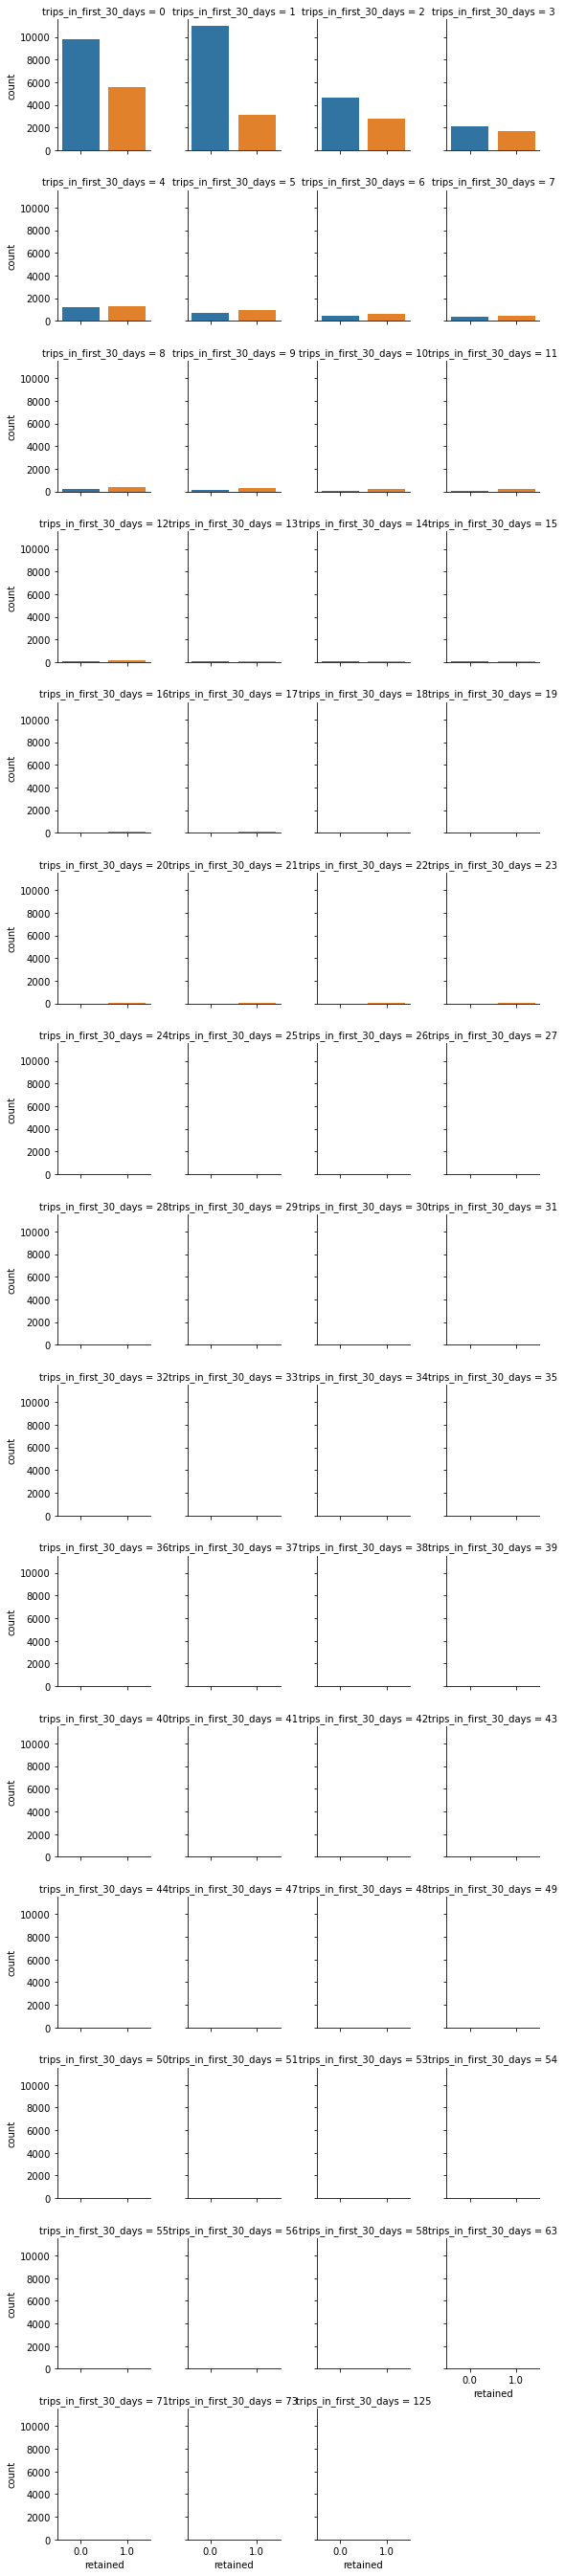

In [34]:
#discrete variable
sns.catplot(x="retained", col="trips_in_first_30_days", col_wrap=4,
                data=data,
                kind="count", height=2.5, aspect=.8)

In [35]:
df1 = data.groupby(['trips_in_first_30_days', 'retained']).size().unstack(fill_value=0)

print(df1.head(20))

retained                  0.0   1.0
trips_in_first_30_days             
0                        9810  5580
1                       10983  3125
2                        4659  2743
3                        2095  1693
4                        1249  1313
5                         690   926
6                         477   657
7                         331   488
8                         200   389
9                         139   332
10                         95   254
11                         86   215
12                         61   160
13                         49   119
14                         46   101
15                         43   112
16                         26    82
17                         37    76
18                         19    61
19                         14    55


In [36]:
#Continuous Variables

In [37]:
data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'avg_rating_by_driver', 'retained'],
      dtype='object')

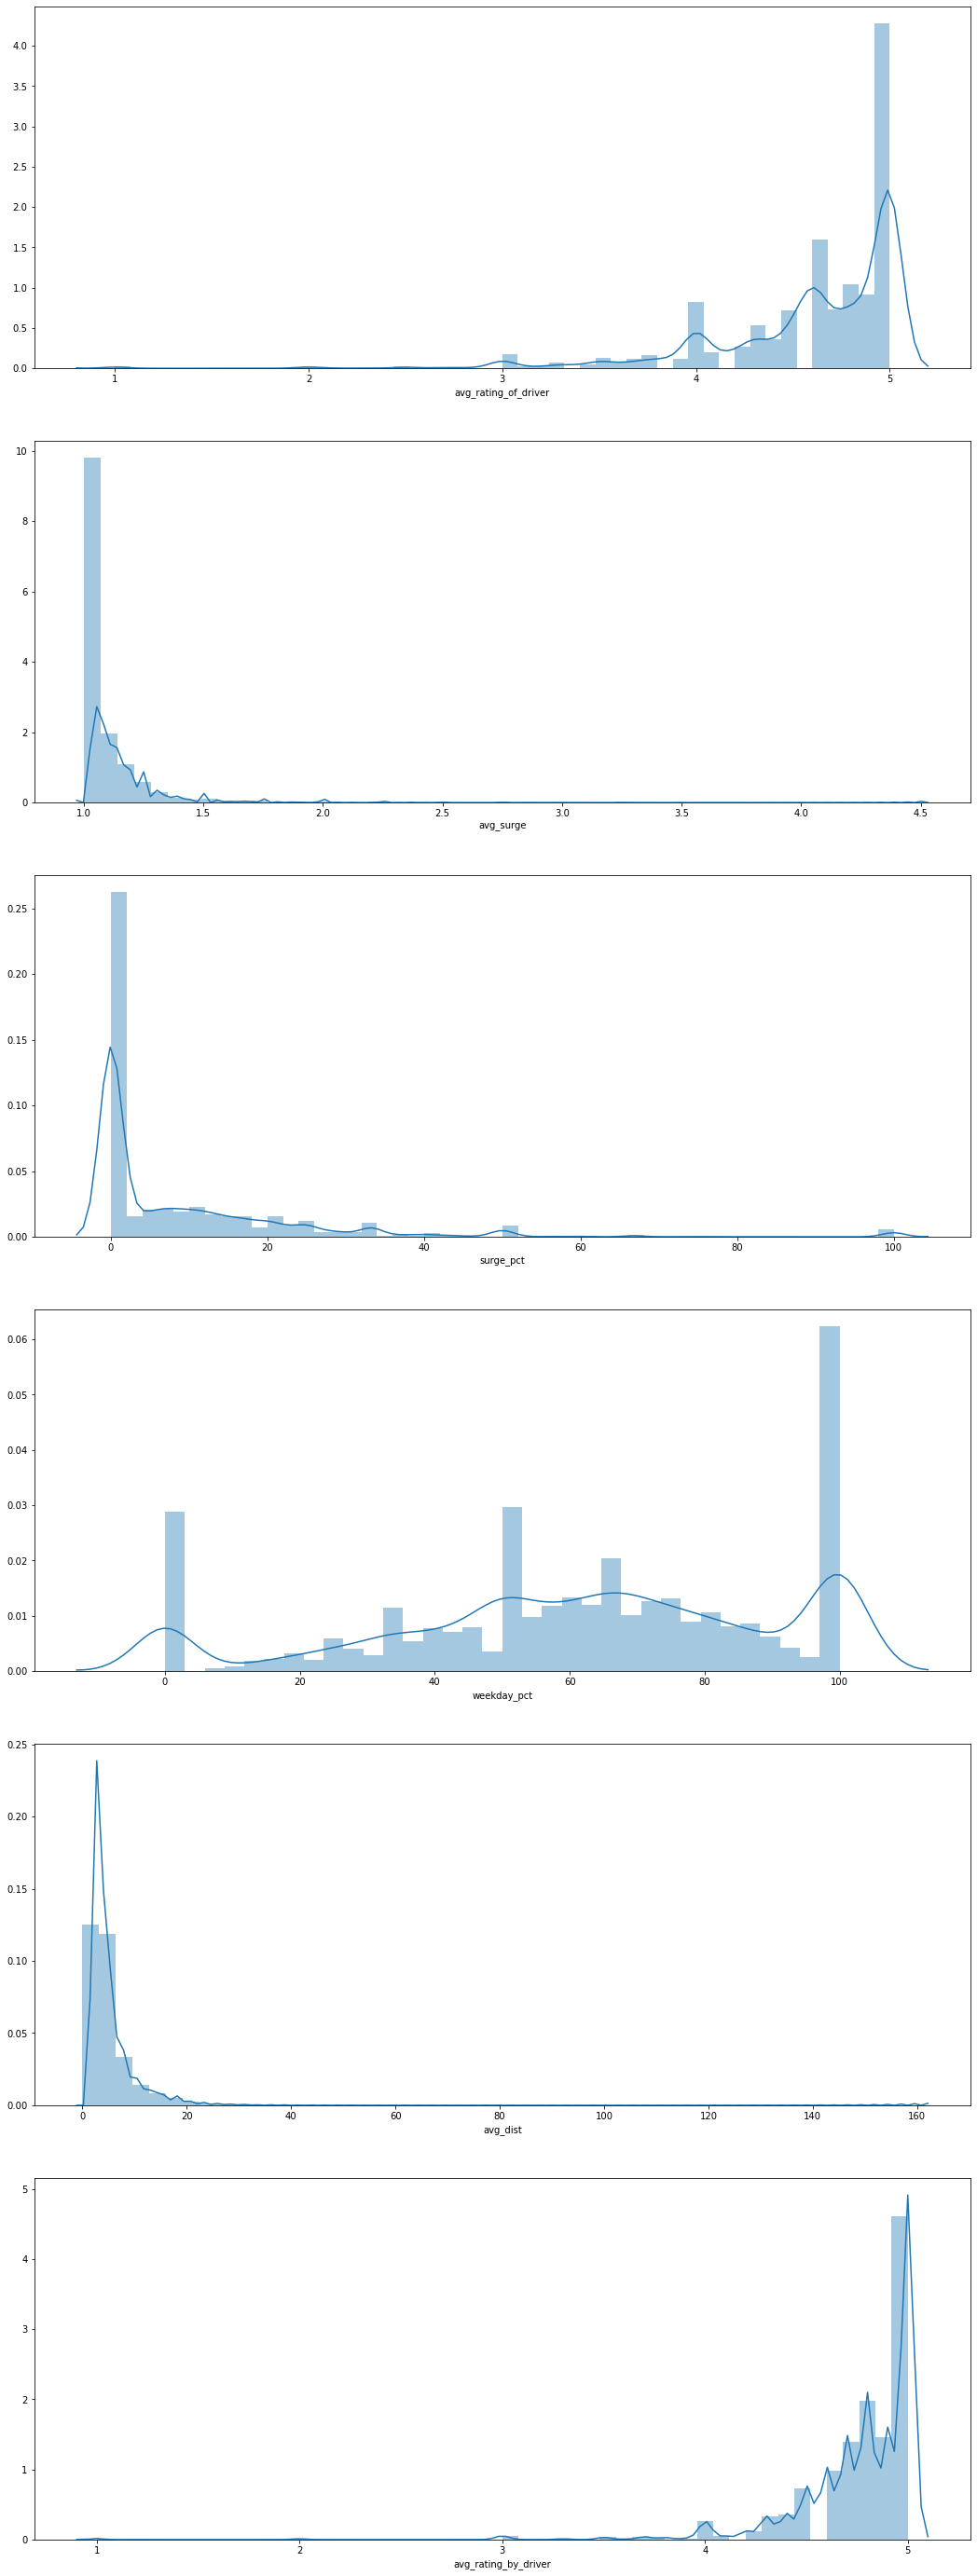

In [38]:
#plot the distribution
fig, axs = plt.subplots(nrows=6, figsize=(18,50))
# Plot histograms regaridng retained drivers
sns.distplot((data[data["retained"]==1]["avg_rating_of_driver"]), ax=axs[0])
sns.distplot((data[data["retained"]==1]["avg_surge"]), ax=axs[1])
sns.distplot((data[data["retained"]==1]["surge_pct"]), ax=axs[2])
sns.distplot((data[data["retained"]==1]["weekday_pct"]), ax=axs[3])
sns.distplot((data[data["retained"]==1]["avg_dist"]), ax=axs[4])
sns.distplot((data[data["retained"]==1]["avg_rating_by_driver"]), ax=axs[5])
plt.show()

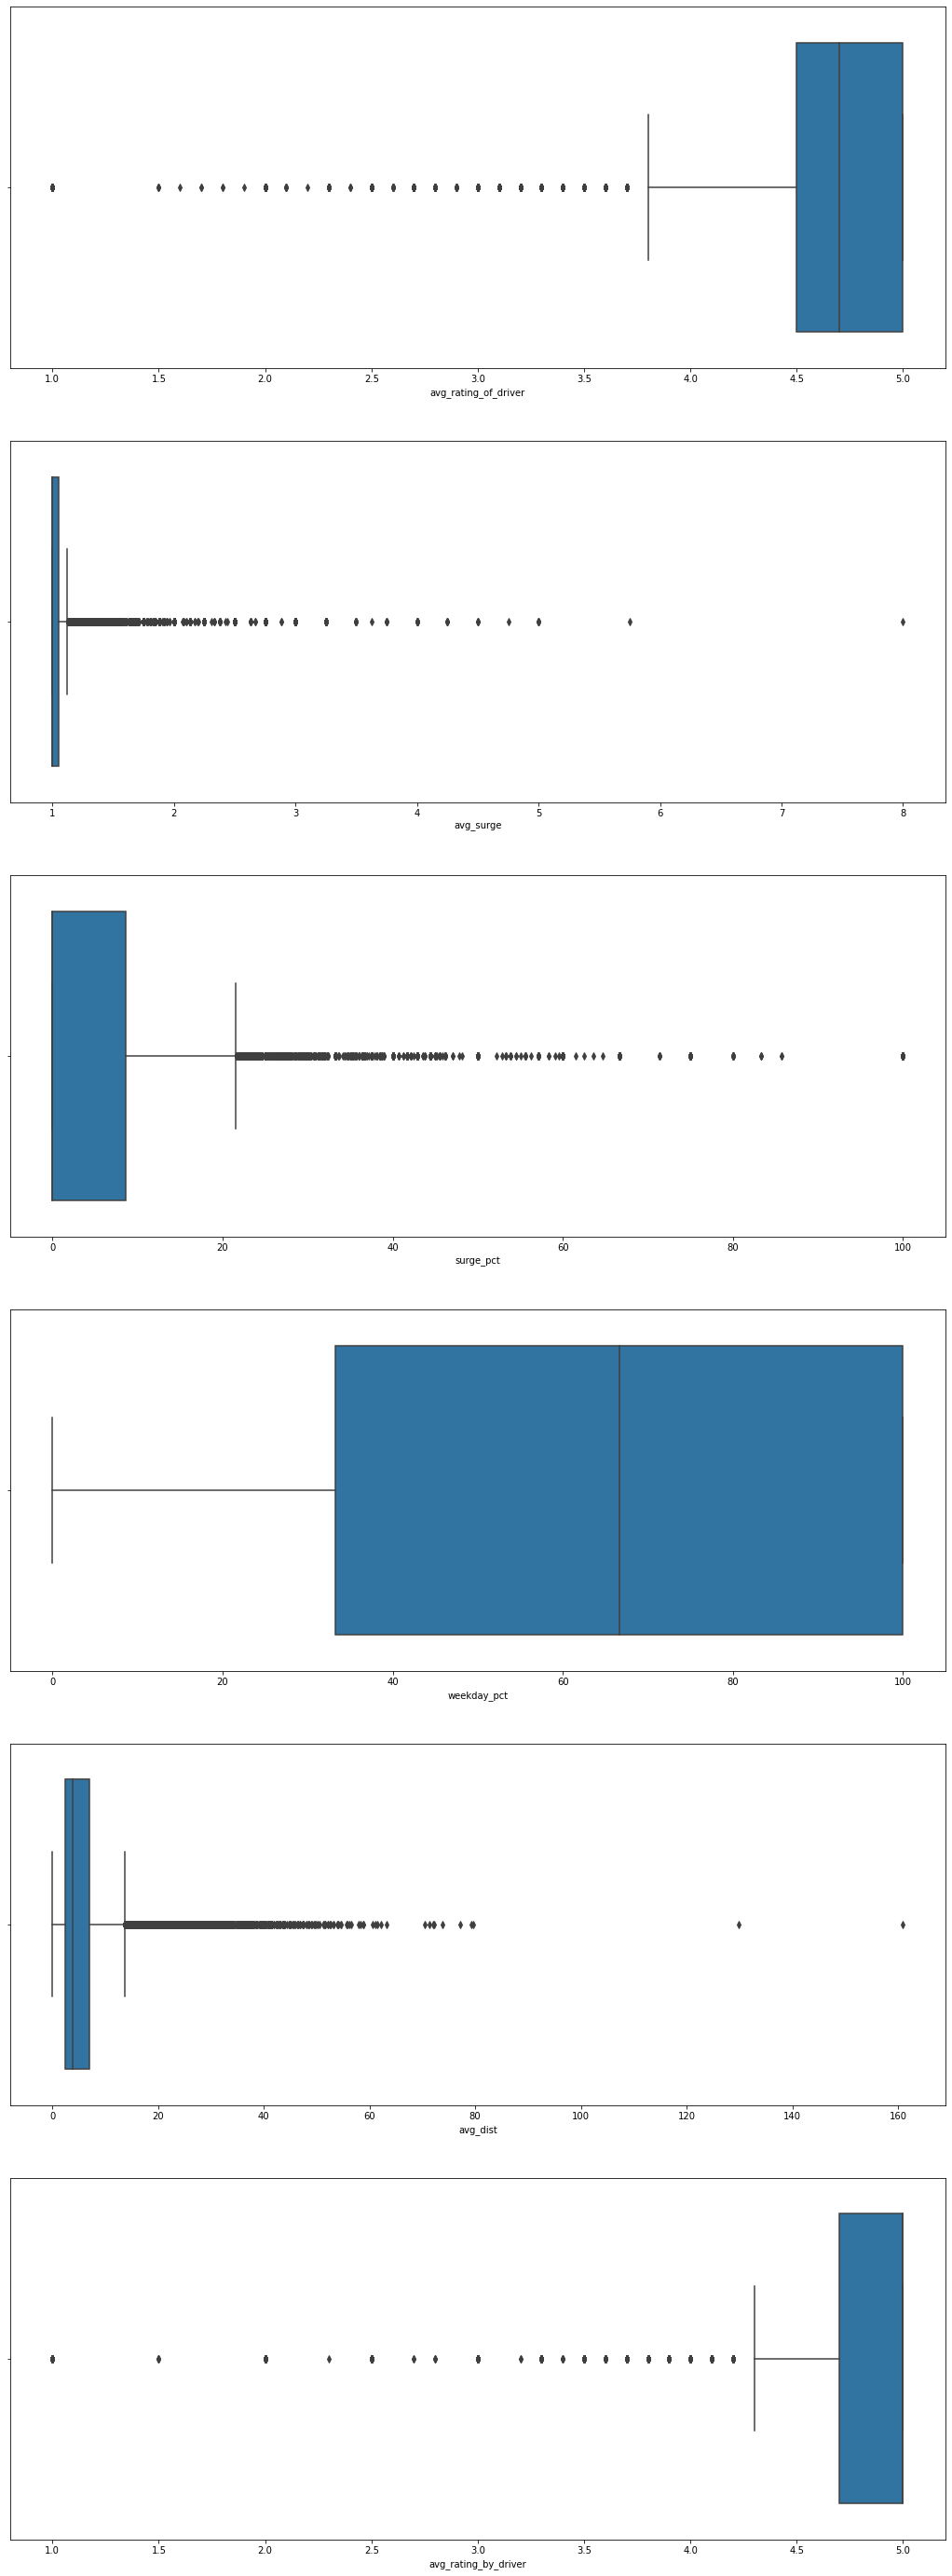

In [39]:
#plot the distribution
fig, axs = plt.subplots(nrows=6, figsize=(18,50))
# Plot boxplot to see any outliers
sns.boxplot((data["avg_rating_of_driver"]), ax=axs[0])
sns.boxplot((data["avg_surge"]), ax=axs[1])
sns.boxplot((data["surge_pct"]), ax=axs[2])
sns.boxplot((data["weekday_pct"]), ax=axs[3])
sns.boxplot((data["avg_dist"]), ax=axs[4])
sns.boxplot((data["avg_rating_by_driver"]), ax=axs[5])
plt.show()

In [40]:
#data prepossesing 
#drop sign up date
data.drop(columns = ['signup_date'], inplace = True)

In [41]:
#create dummy variables
categories_city = pd.get_dummies(data['city'], prefix = 'city')

In [42]:
categories_phone = pd.get_dummies(data['phone'], prefix = 'phone')

In [43]:
categories_ubu = pd.get_dummies(data['ultimate_black_user'], prefix = 'ubuser')

In [44]:
categories_fthirty =pd.DataFrame({'trips_in_first_30_days': data['trips_in_first_30_days'].value_counts()})
categories_fthirty

,trips_in_first_30_days
0,15390
1,14108
2,7402
3,3788
4,2562
5,1616
6,1134
7,819
8,589
9,471


In [45]:
#get the categories with less 400 samples and replace them with null value
to_replace = list(categories_fthirty[categories_fthirty['trips_in_first_30_days']<= 400].index)
data['trips_in_first_30_days'] = data['trips_in_first_30_days'].replace(to_replace, 'null')

In [46]:
categories_fthirty = pd.get_dummies(data['trips_in_first_30_days'], prefix = 'fthirty')

In [47]:
#remove null value
categories_fthirty.drop(columns=['fthirty_null'], inplace = True)

#merge dummy variables to main dataframe merge all the new categories into our main dataframe and remove the old categorical columns

In [48]:
data=pd.merge(data, categories_city, left_index = True, right_index=True)
data=pd.merge(data, categories_phone, left_index = True, right_index=True)
data=pd.merge(data, categories_ubu, left_index = True, right_index=True)
data=pd.merge(data, categories_fthirty, left_index = True, right_index=True)

In [49]:
#remove old categorical columns
data.drop(columns=['city', 'trips_in_first_30_days', 'phone', 'ultimate_black_user'], inplace = True)

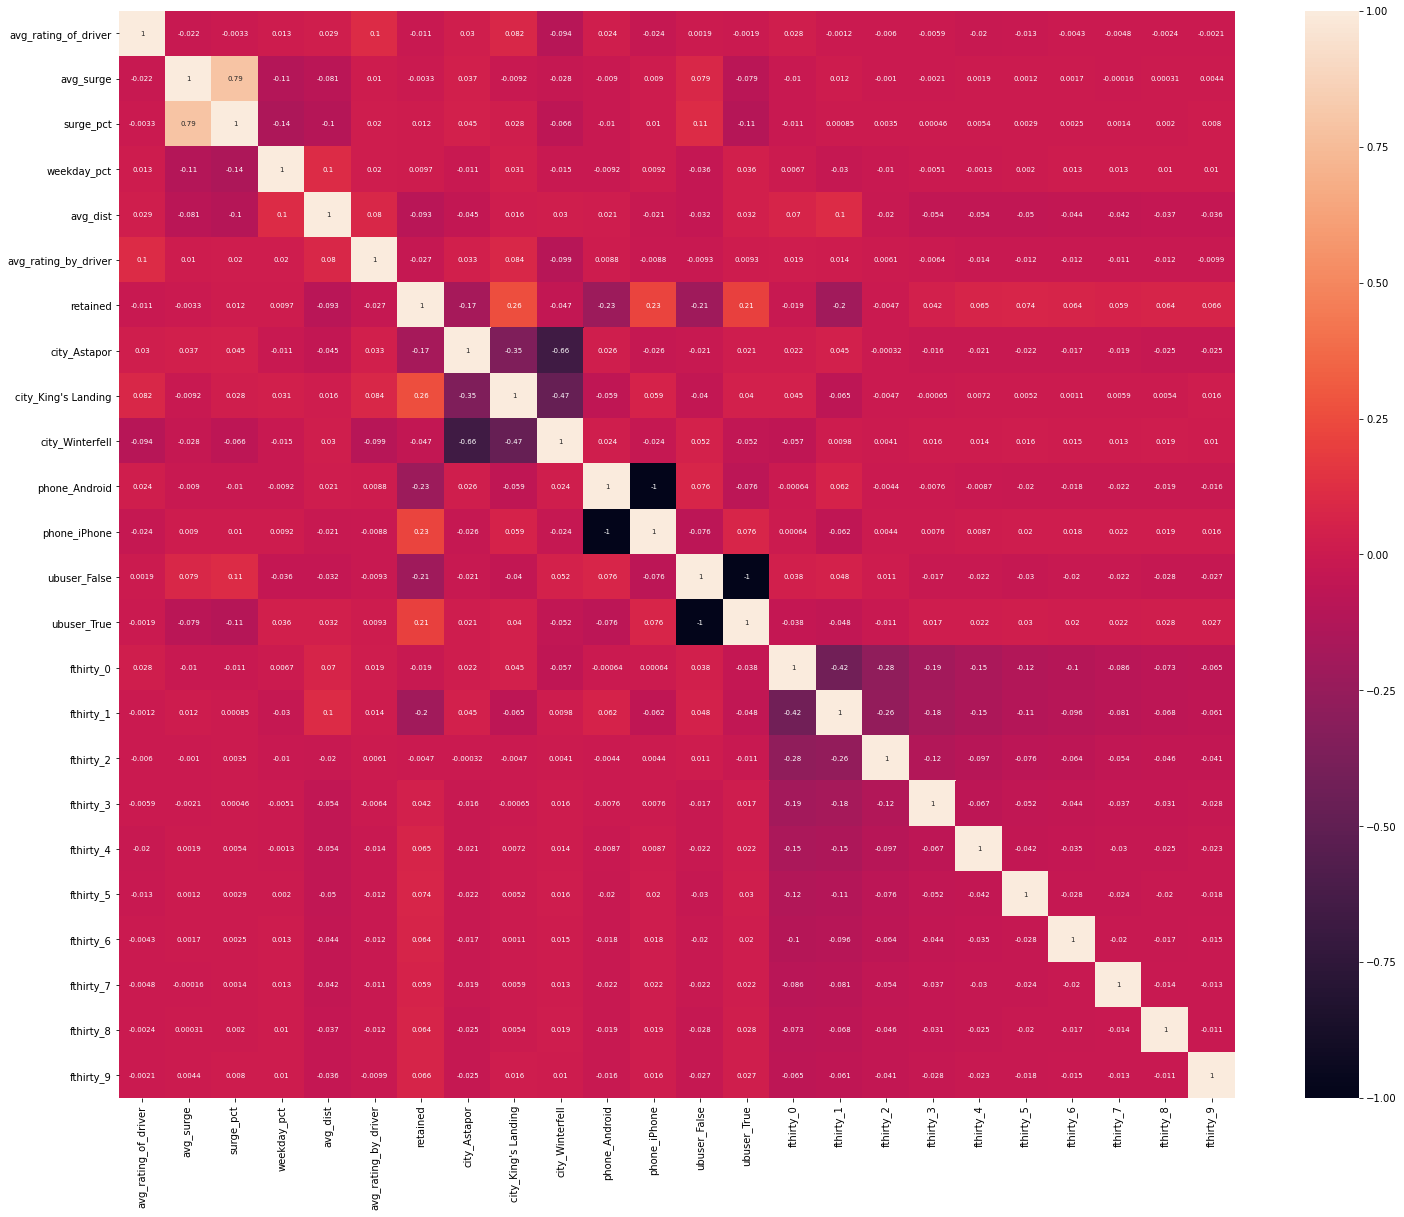

In [50]:
# Check for Corelation between Features - train data
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(),yticklabels=True,cbar=True, annot = True, annot_kws={'size':7})

In [51]:
#'avg_surge' and 'surge_pct' have high correlation, we remove one for multicollinearity purpose
data.drop(columns = ['avg_surge'], inplace = True)

#Remove outliers
Outlier critier: Data point that falls outside of 3 standard deviations.
We will find out the outliers and replace them with the mean.

In [52]:
from scipy.stats import zscore

def replace_outliers_z_score(dataframe, column, Z=3):

    
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

# Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

# Replace with mean values

    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

# Print message

    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [53]:
data.columns

Index(['avg_rating_of_driver', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'ubuser_False', 'ubuser_True', 'fthirty_0', 'fthirty_1',
       'fthirty_2', 'fthirty_3', 'fthirty_4', 'fthirty_5', 'fthirty_6',
       'fthirty_7', 'fthirty_8', 'fthirty_9'],
      dtype='object')

In [54]:
#replace continues variables outliers with mean in train data
data = replace_outliers_z_score(data,"avg_rating_of_driver")
data = replace_outliers_z_score(data,"surge_pct")
data = replace_outliers_z_score(data,"weekday_pct")
data = replace_outliers_z_score(data,"avg_dist")
data = replace_outliers_z_score(data,"avg_rating_by_driver")

Replaced: 701  outliers in  avg_rating_of_driver
Replaced: 1471  outliers in  surge_pct
Replaced: 0  outliers in  weekday_pct
Replaced: 959  outliers in  avg_dist
Replaced: 1004  outliers in  avg_rating_by_driver


In [56]:
#Modeling and Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
#create train and test set for x and y
y = data['retained']
X = data.drop(labels = ['retained'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Logistic Regression
Logistic regression is one of the go-to models used for binary classification and is known as a discriminative classifier. The goal is to draw a line in feature space that divides the 1 samples from the 0 samples. In other words, we wish to find the line which divides the samples between users that were active after 6 months and users that were not. In it's simplest form, logistic regression does this by computing the probability where a probability of less than 0.5 is classified as 0, and a probability of greater than 0.5 is classified as 1.

K-Nearest Neighbors
The intuition behind K-Nearest Neighbors(KNN) is that samples close to each other in feature-space share a label. In other words: if a lot of samples in some area of the feature space belong to one class (active after 6 months) as compared to the other (non active after 6 months), we'll label that part of the feature space as belonging to that class. For a binary classification problem such as ours, this process will then classify the feature space into two class-based regions. Then, given the point in feature space, we find which region its in and its class.

KNN does this by scanning for the k nearest neighbors in the training set of the new sample. Before scanning, we must define a distance in the feature space to define which neighbors are "close". This distance is typically defined as the Euclidean distance, the sum of the square of the difference of each feature value between any two samples.

Decision Tree
Decision trees are a fairly simple classifier and can be described as follows.

At each step of the algorithm we consider a list of possible decision
For each possible decision we recalculate the predictor for that rule
We recalculate the loss for each possible decision
We choose the decision that reduces the loss by the largest amount

In [64]:
num_folds=10

scoring='roc_auc'

models=[]
models.append(('LR', LogisticRegression()))
models.append(('KN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\BlackChip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\BlackChip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

LR: 0.772647 (0.009746)
KN: 0.790997 (0.009023)
CART: 0.681308 (0.007223)


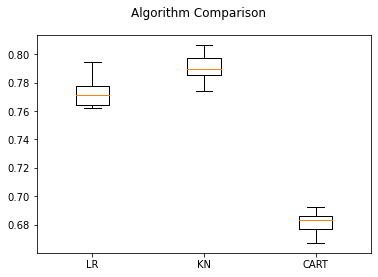

In [65]:
# Visualize comparisons with box plot

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

As we saw earlier in our feature analysis, the distribution of our features were not guassian and most had some skew. Logistic Regression and KNN both assume a gaussian distribution for their model so the unscaled distributions could be affecting performance. Let's see if scaling the data will improve performance.

In [67]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKN', Pipeline([('Scaler', StandardScaler()), ('KN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))

scaled_results = []
scaled_names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle = False, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    scaled_results.append(cv_results)
    scaled_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.779686 (0.009205)
ScaledKN: 0.788881 (0.008947)
ScaledCART: 0.681175 (0.008864)


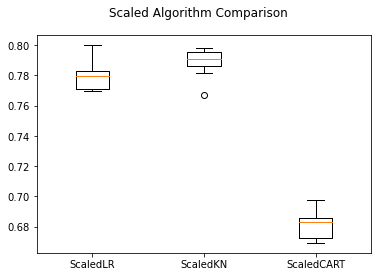

In [68]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scaled_results)
ax.set_xticklabels(scaled_names)
plt.show()

Scaling did not seem to improve performance. Our top performing algorithm with KNN, let's see if we can optimize it to by tuning the model's number of neighbors parameter - the default used is 7. To tune this we will use the Grid Search function from sci-kit learn.

In [69]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier()
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

kfold = KFold(n_splits=num_folds, shuffle = False, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.816750 using {'n_neighbors': 21}
0.681462 (0.008609) with: {'n_neighbors': 1}
0.763837 (0.008056) with: {'n_neighbors': 3}
0.788786 (0.009051) with: {'n_neighbors': 5}
0.799130 (0.008594) with: {'n_neighbors': 7}
0.805312 (0.008956) with: {'n_neighbors': 9}
0.808948 (0.008900) with: {'n_neighbors': 11}
0.812303 (0.008536) with: {'n_neighbors': 13}
0.814172 (0.008289) with: {'n_neighbors': 15}
0.815826 (0.008546) with: {'n_neighbors': 17}
0.815961 (0.008577) with: {'n_neighbors': 19}
0.816750 (0.008549) with: {'n_neighbors': 21}


Now that we have tuned our KNN model to it's optimal performance, let's visualize our performance by plotting the roc curve.

In [75]:
 X_train, X_test = X.iloc[train_index], X.iloc[test_index]

 y_train, y_test = y.iloc[train_index], y.iloc[test_index]

NameError: name 'train_index' is not defined

In [72]:
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
classifier = KNeighborsClassifier(n_neighbors=21)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

KeyError: "None of [Int64Index([ 4956,  4957,  4963,  4965,  4967,  4970,  4971,  4972,  4973,\n             4975,\n            ...\n            49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998,\n            49999],\n           dtype='int64', length=45000)] are in the [columns]"